<a href="https://colab.research.google.com/github/Mbatiany/w2_core/blob/main/Brendah_Core_Week_2_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

**Analytic Question**

Which individuals are most likely to have or use a bank account

**Metric for Success**

Identify the major factors that would determineand even predict the possibility of adults in the access of bank *accounts*

##  Reading the Data

In [1]:
#imprting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the Data from the source 
# ---
# Dataset url = http://bit.ly/VariableDefinitions
#Dataset url= http://bit.ly/FinancialDataset
# ---
#
df= pd.read_csv("http://bit.ly/VariableDefinitions")
dg=pd.read_csv("http://bit.ly/FinancialDataset")

In [3]:
#preview columns
print(df)
print(dg)

      Variable Definitions                                         Unnamed: 1
0                  country                         Country interviewee is in.
1                     year                           Year survey was done in.
2                 uniqueid             Unique identifier for each interviewee
3            location_type                     Type of location: Rural, Urban
4         cellphone_access  If interviewee has access to a cellphone: Yes, No
5           household_size               Number of people living in one house
6        age_of_respondent                         The age of the interviewee
7     gender_of_respondent                Gender of interviewee: Male, Female
8   relationship_with_head  The interviewee’s relationship with the head o...
9           marital_status  The martial status of the interviewee: Married...
10         education_level  Highest level of education: No formal educatio...
11                job_type  Type of job interviewee has: Farming

In [4]:
#join datasets
core_df= pd.concat([df, dg], axis=1)
core_df.head()

,Variable Definitions,Unnamed: 1,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,country,Country interviewee is in.,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,year,Year survey was done in.,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,uniqueid,Unique identifier for each interviewee,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,location_type,"Type of location: Rural, Urban",Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No",Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


##  Checking the Data

In [9]:
# Determining the no. of records in our dataset
#
core_df.shape

(23524, 15)

In [6]:
# Previewing the top of our dataset
#
core_df.head()

,Variable Definitions,Unnamed: 1,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,country,Country interviewee is in.,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,year,Year survey was done in.,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,uniqueid,Unique identifier for each interviewee,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,location_type,"Type of location: Rural, Urban",Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No",Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [10]:
# Previewing the bottom of our dataset
# 
core_df.tail()

,Variable Definitions,Unnamed: 1,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,NaN,NaN,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,NaN,NaN,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,NaN,NaN,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,NaN,NaN,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,NaN,NaN,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [11]:
# Checking whether each column has an appropriate datatype
#
core_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Variable Definitions    12 non-null     object 
 1   Unnamed: 1              12 non-null     object 
 2   country                 23510 non-null  object 
 3   year                    23524 non-null  int64  
 4   uniqueid                23524 non-null  object 
 5   Has a Bank account      23488 non-null  object 
 6   Type of Location        23509 non-null  object 
 7   Cell Phone Access       23513 non-null  object 
 8   household_size          23496 non-null  float64
 9   Respondent Age          23490 non-null  float64
 10  gender_of_respondent    23490 non-null  object 
 11  The relathip with head  23520 non-null  object 
 12  marital_status          23492 non-null  object 
 13  Level of Educuation     23495 non-null  object 
 14  Type of Job             23494 non-null

**# DATA CLEANING**

In [12]:
#drop unnecessary columns
core_df.drop(['uniqueid'],axis=1, inplace=True)

In [13]:
core_df.drop(['The relathip with head'],axis=1, inplace=True)

In [14]:
core_df.drop(['Variable Definitions'],axis=1, inplace=True)

In [15]:
core_df.drop(['Unnamed: 1'],axis=1, inplace=True)

In [16]:
core_df.head(2)

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent


In [17]:
#rename columns
core_df.columns =['country',	'year',	'has_bank_account',	'location_type',	'cell_phone_access',	'household_size',	'respondent_age',	'gender_of_respondent',	'marital_status', 'education_level', 'job_type']


In [18]:
#check if columns were correctly renamed
core_df.head(2)

,country,year,has_bank_account,location_type,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent


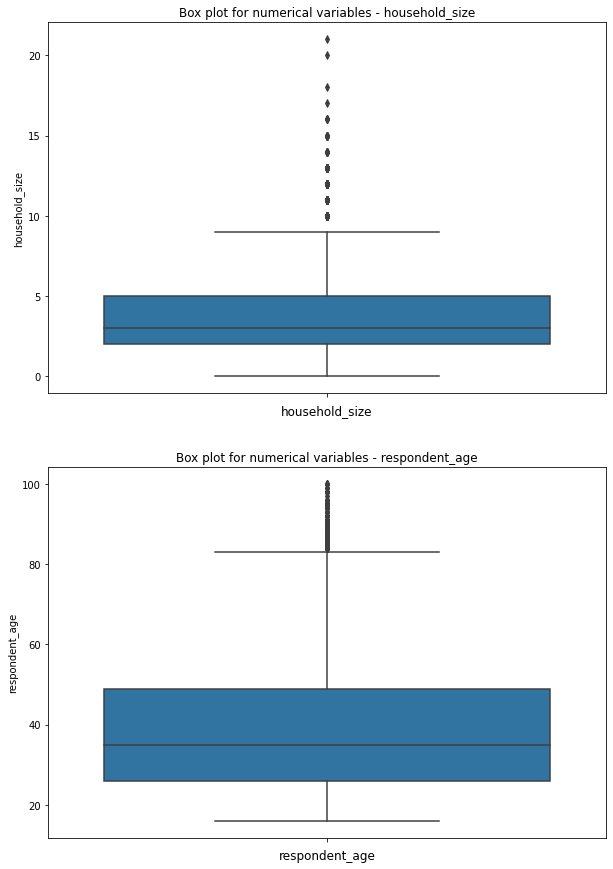

In [24]:
# Checking for Outliers
#household size
#sns.boxplot(core_df['household_size'])

col_names= ['household_size', 'respondent_age',]

fig, ax = plt.subplots(len(col_names), figsize=(10,15))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=core_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

The dots represents outliers. Household_size contains outliers above 10 while respondent_age contains outliers above age 85


In [25]:
#checking for anomalies
#most columns contain 'nan' as anomalies which will be dropped


In [26]:

core_df.country.unique()

array(['Kenya', 'Rwanda', 'Tanzania', nan, 'Uganda'], dtype=object)

In [27]:
core_df.has_bank_account.unique()

array(['Yes', 'No', nan], dtype=object)

In [28]:
core_df.location_type.unique()

array(['Rural', 'Urban', nan], dtype=object)

In [29]:
core_df.gender_of_respondent.unique()

array(['Female', 'Male', nan], dtype=object)

In [30]:
core_df.respondent_age.unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        nan,  93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,
        94.,  87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

In [31]:
core_df.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [32]:
#dealing with year anomalies
#drop 2029,2056,2039

anomaly = core_df[core_df['year'] > 2018].index
core_df = core_df.drop(anomaly)
core_df['year'].unique()

array([2018, 2016, 2017])

In [33]:
# Identifying the Missing Data
#
core_df.isnull().sum()

country                 14
year                     0
has_bank_account        36
location_type           15
cell_phone_access       11
household_size          28
respondent_age          34
gender_of_respondent    34
marital_status          32
education_level         29
job_type                30
dtype: int64

The data contains missing values which will be dropped

In [34]:
# Dealing with the Missing Data
#drop missing values
core_df.dropna(inplace=True)

In [35]:
#check if missing values were dropped
core_df.isnull().sum()

country                 0
year                    0
has_bank_account        0
location_type           0
cell_phone_access       0
household_size          0
respondent_age          0
gender_of_respondent    0
marital_status          0
education_level         0
job_type                0
dtype: int64

zeros shows that missing values were actually dropped

In [36]:
# check duplicates
#
core_df.duplicated().sum()

4931

I chose to retain duplicates because they are significant in our study

# **`EXPLORATORY ANALYSIS`**

***Measures of central tendency***

In [37]:
#household_size mean
core_df['household_size'].mean()


3.688560411311054

In [38]:
#respondent_age mean
core_df['respondent_age'].mean()

38.80706940874036

In [39]:
#county mode
core_df['country'].mode()

0    Rwanda
dtype: object

In [40]:
#year mode
core_df['year'].mode()

0    2016
dtype: int64

In [41]:
#has bank account mode
core_df['has_bank_account'].mode()

0    No
dtype: object

In [42]:
#location type mode
core_df['location_type'].mode()

0    Rural
dtype: object

In [43]:
#respondent age mode
core_df['respondent_age'].mode()

0    30.0
dtype: float64

In [44]:
#gender of respondent mode
core_df['gender_of_respondent'].mode()

0    Female
dtype: object

In [45]:
#marital status mode
core_df['marital_status'].mode()

0    Married/Living together
dtype: object

In [46]:
#education level mode
core_df['education_level'].mode()

0    Primary education
dtype: object

In [47]:
#job type mode
core_df.job_type.mode()

0    Self employed
dtype: object

In [48]:
#median()
core_df.median()


year              2017.0
household_size       3.0
respondent_age      35.0
dtype: float64

***Measures of Dispesion***

In [49]:
#range of household size column
maxhousehold = core_df.household_size.max()
minhousehold = core_df.household_size.min()
range = maxhousehold - minhousehold
range

21.0

In [50]:

#range of Age column
maxage = core_df.respondent_age.max()
minage = core_df.respondent_age.min()
range = maxage - minage
range

84.0

In [51]:
#variance
core_df.var()

year                0.721031
household_size      5.204214
respondent_age    272.907247
dtype: float64

In [52]:
#standard deviation
core_df.std()

year               0.849136
household_size     2.281275
respondent_age    16.519905
dtype: float64

In [53]:
#sskewness
core_df.skew()

year              0.042833
household_size    0.974183
respondent_age    0.840615
dtype: float64

The data is slighly skewed positively which also portrays normal distribution

In [54]:
#kurtosis
core_df.kurt()

year             -1.611829
household_size    1.153836
respondent_age    0.098268
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


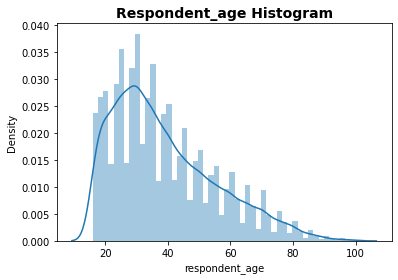

In [55]:
#histogram displaying the column Age

sns.distplot(core_df['respondent_age'], kde=True)
plt.title('Respondent_age Histogram',weight='bold',fontsize=14)
sns.set_context('talk')
sns.set_theme(palette='flag_r')


The distribution is right skewed but still portray normal distribution

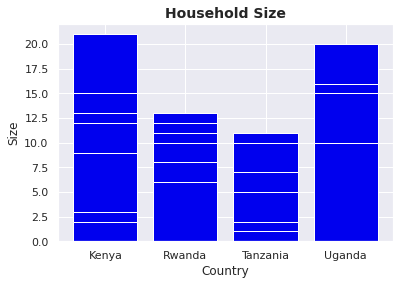

In [56]:
#bar chart displaying the column household size
plt.bar(core_df['country'],core_df['household_size'])
plt.title('Household Size',fontsize=14, weight='bold')
plt.xlabel('Country')
plt.ylabel('Size')
sns.set_theme(context='paper', palette='flag_r')




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


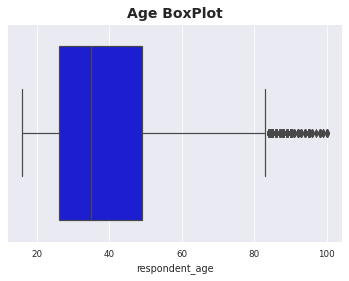

In [64]:
#Boxplot displaying the column age
#The data is tightly grouped
#There are presence of outliers in the column that were retained since they proved useful

sns.boxplot(core_df['respondent_age'])
plt.title("Age BoxPlot", weight='bold', fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


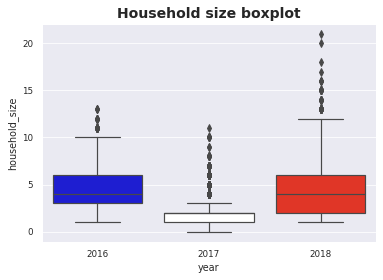

In [63]:
#Boxplot showing relationship between year and household sizes

sns.boxplot(core_df['year'],core_df['household_size'])
plt.title('Household size boxplot',weight='bold',fontsize=14)
plt.show()

In [65]:
#frequency table of the respondent age
core_df.respondent_age.value_counts()

30.0     1043
35.0      831
25.0      785
28.0      742
32.0      707
         ... 
100.0       5
93.0        4
96.0        3
99.0        2
97.0        1
Name: respondent_age, Length: 85, dtype: int64

In [66]:
#frequency table of  household size column
core_df.household_size.value_counts()

2.0     5072
1.0     3928
3.0     3513
4.0     3199
5.0     2716
6.0     2028
7.0     1378
8.0      740
9.0      354
10.0     191
12.0      66
11.0      66
0.0       36
13.0      25
15.0      11
14.0       9
16.0       4
18.0       1
20.0       1
21.0       1
17.0       1
Name: household_size, dtype: int64

In [67]:
#frequency table of the year 
core_df.year.value_counts()

2016    8683
2018    8157
2017    6500
Name: year, dtype: int64

**Univariate Analysis for Kenya**

In [147]:
Kenya=core_df[core_df['country'] =='Kenya']
Kenya

,country,year,has_bank_account,location_type,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
6063,Kenya,2018,No,Rural,Yes,4.0,26.0,Female,Married/Living together,Primary education,Remittance Dependent
6064,Kenya,2018,No,Urban,No,5.0,17.0,Female,Single/Never Married,Secondary education,Remittance Dependent
6065,Kenya,2018,No,Rural,Yes,9.0,30.0,Female,Married/Living together,No formal education,Farming and Fishing
6066,Kenya,2018,No,Rural,Yes,3.0,52.0,Male,Married/Living together,Primary education,Self employed


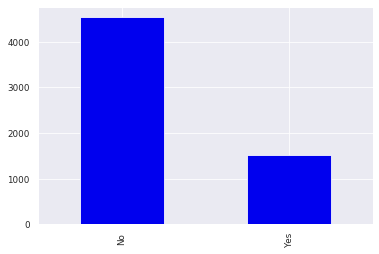

In [157]:
Kenya["has_bank_account"].value_counts().plot(kind= 'bar')

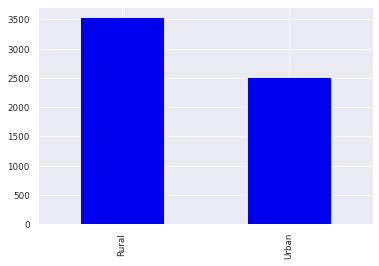

In [159]:
Kenya["location_type"].value_counts().plot(kind= 'bar')

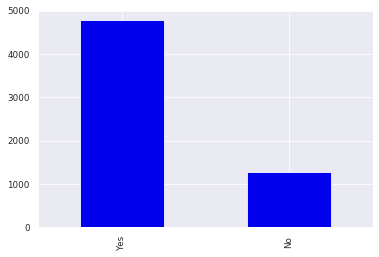

In [160]:
Kenya["cell_phone_access"].value_counts().plot(kind= 'bar')

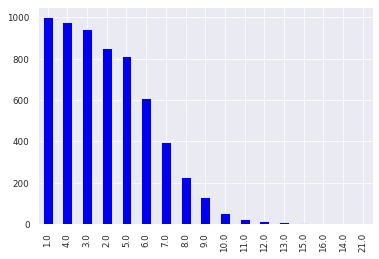

In [161]:
Kenya["household_size"].value_counts().plot(kind= 'bar')

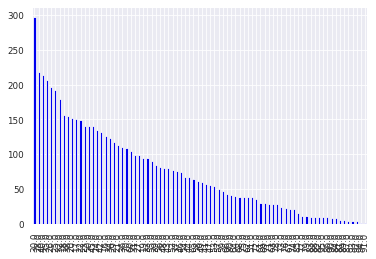

In [162]:
Kenya["respondent_age"].value_counts().plot(kind= 'bar')

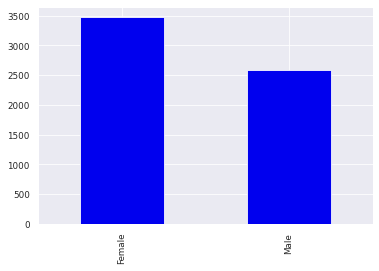

In [164]:
Kenya["gender_of_respondent"].value_counts().plot(kind= 'bar')

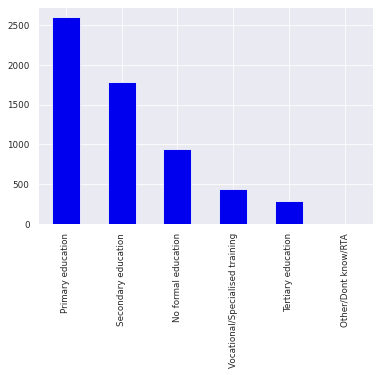

In [166]:
Kenya["education_level"].value_counts().plot(kind= 'bar')

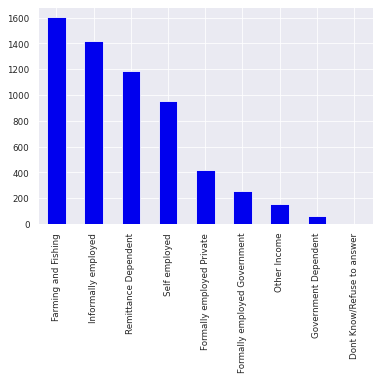

In [167]:
Kenya["job_type"].value_counts().plot(kind= 'bar')

In [168]:
Uganda=core_df[core_df['country'] =='Uganda']
Uganda

,country,year,has_bank_account,location_type,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,education_level,job_type
21423,Uganda,2018,No,Rural,No,5.0,32.0,Female,Divorced/Seperated,Primary education,Other Income
21424,Uganda,2018,No,Urban,Yes,8.0,65.0,Female,Widowed,Secondary education,Self employed
21425,Uganda,2018,No,Rural,No,7.0,35.0,Female,Married/Living together,Primary education,Self employed
21426,Uganda,2018,No,Rural,No,3.0,25.0,Female,Married/Living together,Primary education,Other Income
21427,Uganda,2018,No,Urban,Yes,9.0,18.0,Female,Single/Never Married,Secondary education,Other Income
...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Divorced/Seperated,Secondary education,Self employed


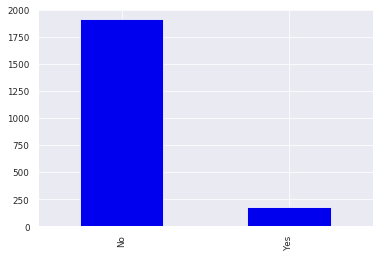

In [169]:
Uganda["has_bank_account"].value_counts().plot(kind= 'bar')

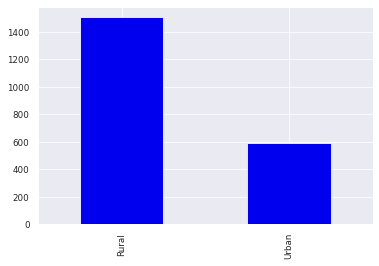

In [170]:
Uganda["location_type"].value_counts().plot(kind= 'bar')

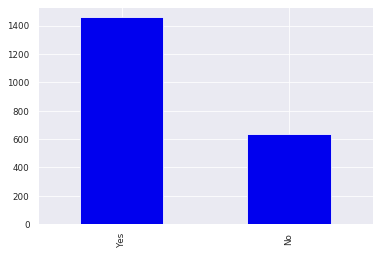

In [171]:
Uganda["cell_phone_access"].value_counts().plot(kind= 'bar')

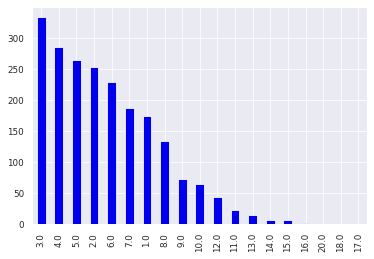

In [172]:
Uganda["household_size"].value_counts().plot(kind= 'bar')

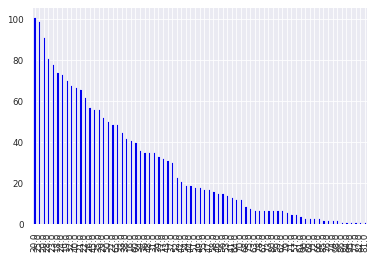

In [173]:
Uganda["respondent_age"].value_counts().plot(kind= 'bar')

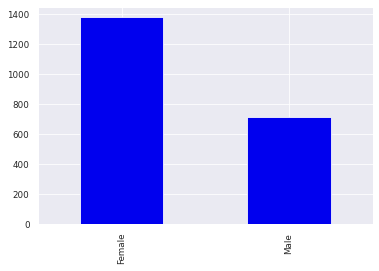

In [174]:
Uganda["gender_of_respondent"].value_counts().plot(kind= 'bar')

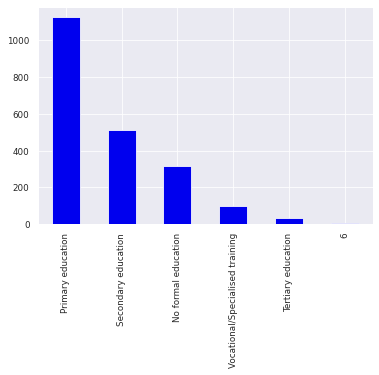

In [175]:
Uganda["education_level"].value_counts().plot(kind= 'bar')

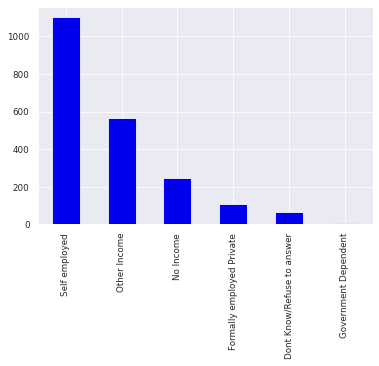

In [176]:
Uganda["job_type"].value_counts().plot(kind= 'bar')

In [177]:
Tanzania=core_df[core_df['country'] =='Tanzania']
Tanzania

,country,year,has_bank_account,location_type,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,education_level,job_type
14803,Tanzania,2017,No,Rural,Yes,1.0,22.0,Female,Divorced/Seperated,Secondary education,No Income
14804,Tanzania,2017,No,Urban,No,2.0,100.0,Male,Single/Never Married,No formal education,Self employed
14805,Tanzania,2017,No,Urban,Yes,3.0,19.0,Female,Widowed,No formal education,No Income
14806,Tanzania,2017,No,Urban,No,4.0,21.0,Female,Single/Never Married,Primary education,Remittance Dependent
14807,Tanzania,2017,Yes,Urban,Yes,3.0,24.0,Female,Divorced/Seperated,Tertiary education,Formally employed Private
...,...,...,...,...,...,...,...,...,...,...,...
21418,Tanzania,2017,No,Rural,No,2.0,25.0,Male,Single/Never Married,Primary education,Self employed
21419,Tanzania,2017,No,Urban,Yes,2.0,52.0,Male,Single/Never Married,Primary education,Self employed
21420,Tanzania,2017,No,Rural,No,5.0,16.0,Female,Divorced/Seperated,Primary education,Formally employed Private
21421,Tanzania,2017,No,Urban,Yes,2.0,48.0,Male,Single/Never Married,Primary education,Self employed


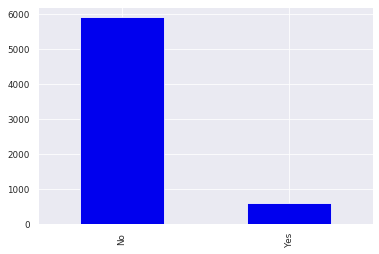

In [178]:
Tanzania["has_bank_account"].value_counts().plot(kind= 'bar')

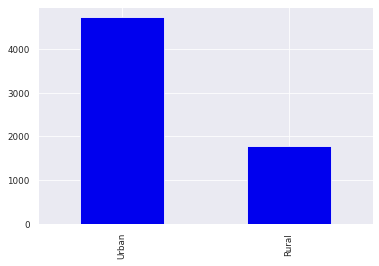

In [179]:
Tanzania["location_type"].value_counts().plot(kind= 'bar')

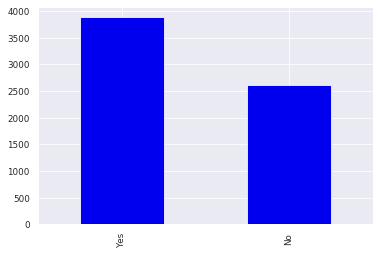

In [180]:
Tanzania["cell_phone_access"].value_counts().plot(kind= 'bar')

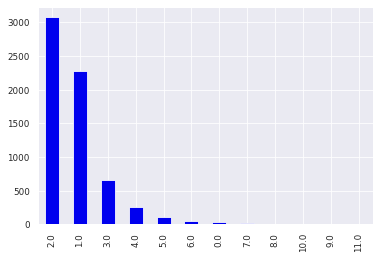

In [181]:
Tanzania["household_size"].value_counts().plot(kind= 'bar')

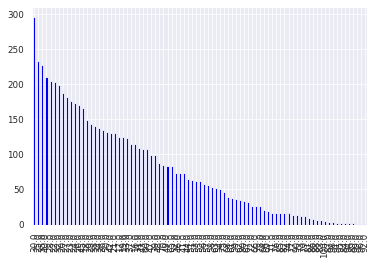

In [182]:
Tanzania["respondent_age"].value_counts().plot(kind= 'bar')

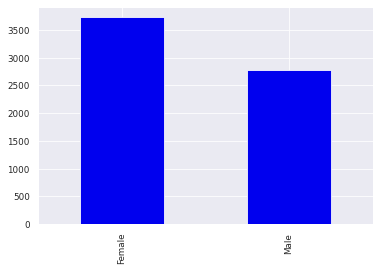

In [183]:
Tanzania["gender_of_respondent"].value_counts().plot(kind= 'bar')

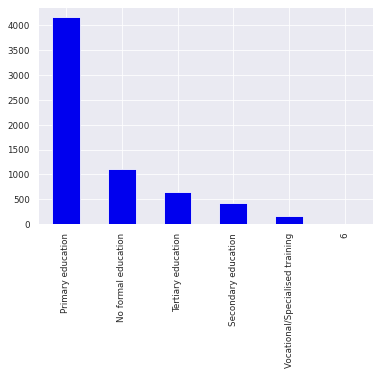

In [184]:
Tanzania["education_level"].value_counts().plot(kind= 'bar')

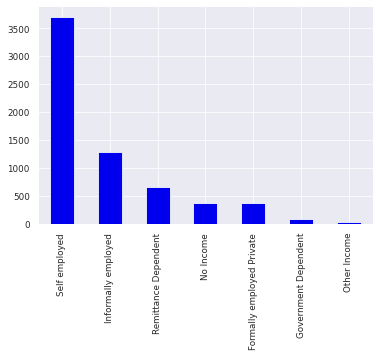

In [185]:
Tanzania["job_type"].value_counts().plot(kind= 'bar')

In [186]:
Rwanda=core_df[core_df['country'] =='Rwanda']
Rwanda

,country,year,has_bank_account,location_type,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,education_level,job_type
6068,Rwanda,2016,No,Urban,Yes,7.0,18.0,Female,Single/Never Married,Secondary education,Remittance Dependent
6069,Rwanda,2016,Yes,Urban,Yes,4.0,26.0,Female,Married/Living together,Secondary education,Self employed
6070,Rwanda,2016,No,Rural,No,6.0,42.0,Male,Married/Living together,No formal education,Farming and Fishing
6071,Rwanda,2016,Yes,Urban,Yes,1.0,41.0,Male,Single/Never Married,Tertiary education,Informally employed
6072,Rwanda,2016,No,Rural,No,4.0,17.0,Female,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
14798,Rwanda,2016,No,Rural,Yes,5.0,31.0,Female,Married/Living together,Primary education,Farming and Fishing
14799,Rwanda,2016,No,Rural,No,6.0,49.0,Female,Married/Living together,No formal education,Remittance Dependent
14800,Rwanda,2016,No,Rural,Yes,6.0,42.0,Female,Married/Living together,Primary education,Farming and Fishing
14801,Rwanda,2016,No,Rural,Yes,6.0,65.0,Male,Married/Living together,Primary education,Informally employed


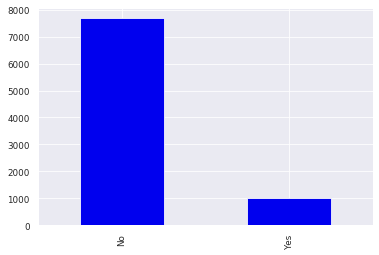

In [187]:
Rwanda["has_bank_account"].value_counts().plot(kind= 'bar')

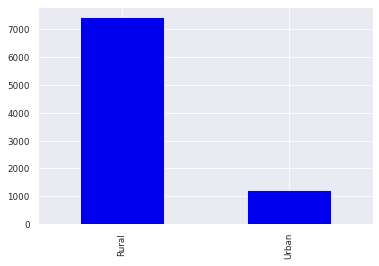

In [188]:
Rwanda["location_type"].value_counts().plot(kind= 'bar')

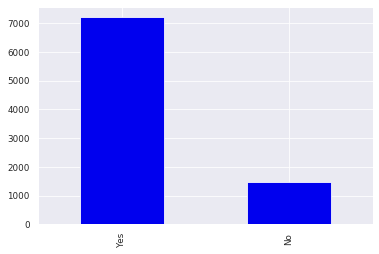

In [189]:
Rwanda["cell_phone_access"].value_counts().plot(kind= 'bar')

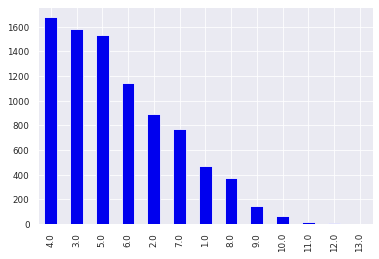

In [190]:
Rwanda["household_size"].value_counts().plot(kind= 'bar')

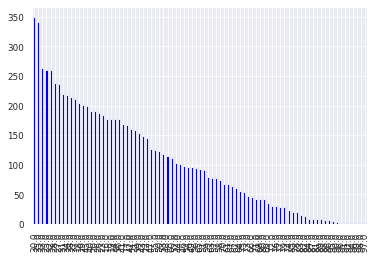

In [191]:
Rwanda["respondent_age"].value_counts().plot(kind= 'bar')

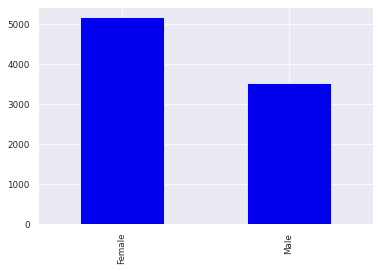

In [192]:
Rwanda["gender_of_respondent"].value_counts().plot(kind= 'bar')

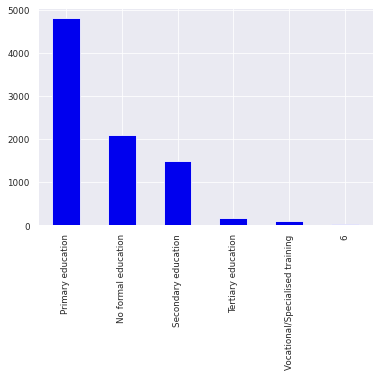

In [193]:
Rwanda["education_level"].value_counts().plot(kind= 'bar')

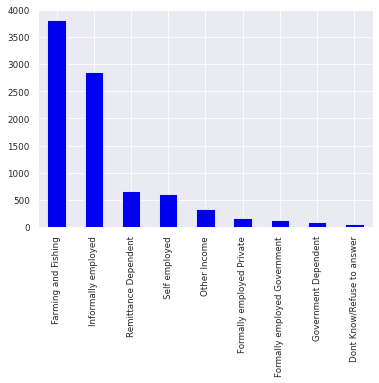

In [194]:
Rwanda["job_type"].value_counts().plot(kind= 'bar')

# **`(ii) BIVARIATE ANALYSIS`**

> Indented block



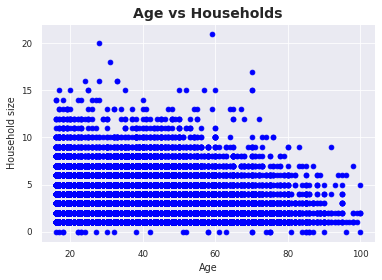

In [68]:
#scatter plot 
#Age vs household size
plt.scatter(core_df['respondent_age'],core_df['household_size'],color='b')
plt.title('Age vs Households',weight='bold',fontsize=14)
plt.xlabel("Age")
plt.ylabel("Household size")

plt.show()


The distribution is inclined more to the young people as compared to the old people

Text(0.5, 1.0, 'cell phones vs households')

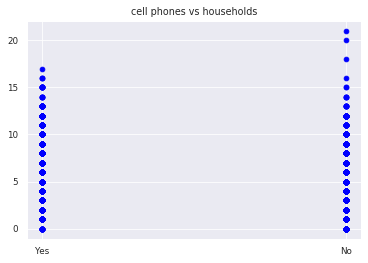

In [69]:
#scatter plot showing relatinship between
#cell phone access and household size
plt.scatter(core_df['cell_phone_access'],core_df['household_size'],label='size',color='b')
plt.title('cell phones vs households')

a greater number of people living in households have no cell_phone access

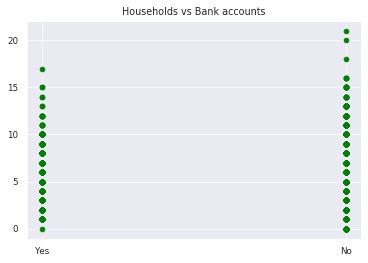

In [70]:
#scatter
#bank account vs households
plt.scatter(core_df['has_bank_account'],core_df['household_size'], color='green')
plt.title('Households vs Bank accounts')

plt.show()

Fewer number of households have bank accounts compared to those who don't

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

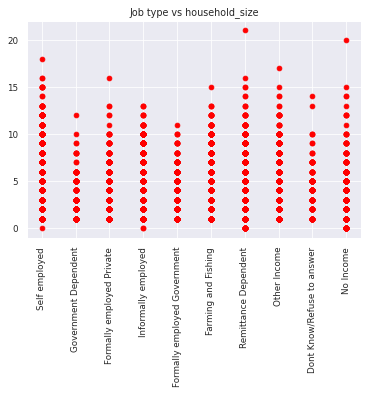

In [72]:
#scatter
#job type vs households
plt.scatter(core_df['job_type'],core_df['household_size'], color='red')
plt.title('Job type vs household_size')
plt.xticks(rotation=90)


There are relatively fewer government dependent and those formally employed by the goverment compared to other job types in the households

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

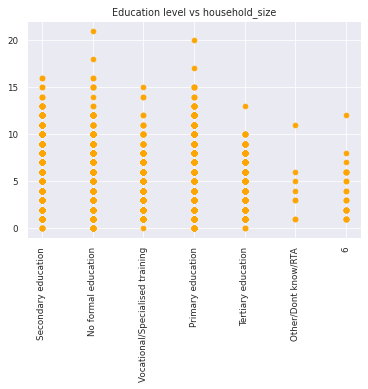

In [75]:
#scatter
#education level vs households
plt.scatter(core_df['education_level'],core_df['household_size'], color='orange')
plt.title('Education level vs household_size')
plt.xticks(rotation=90)

From the cluster, many people have primary education while most had no formal education.

In [76]:
core_df['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

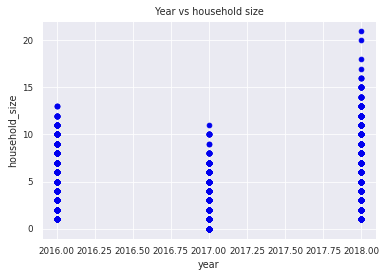

In [77]:
#year vs household size
plt.scatter(core_df["year"],core_df["household_size"])
plt.title("Year vs household size")
plt.xlabel('year')
plt.ylabel("household_size")
#plt.xticks(np.arange(min(year), max(year)+1, 1.0))
plt.show()


There exists a decrease in household size from 2016 to 2017 , but the number showed a steady increase going on to 2018.

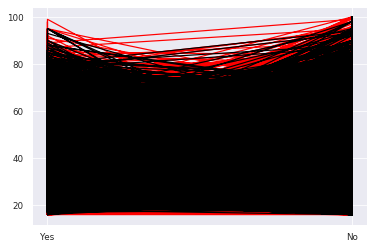

In [78]:
#line chart showing relationship between
#cellphone acess & respondent age
#bank account & respondent age
plt.plot(core_df['cell_phone_access'],core_df['respondent_age'], color='r')
plt.plot(core_df['has_bank_account'],core_df['respondent_age'],color='black')

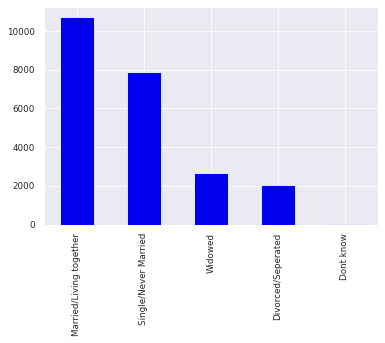

In [84]:
# repondents by marital status
core_df['marital_status'].value_counts().plot.bar()


The highest number of residents were married amd living together

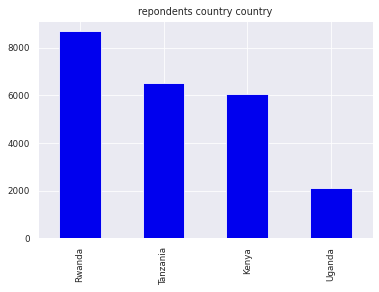

In [82]:
#comparison of respondents per country
core_df['country'].value_counts().plot.bar(title='repondents country country')


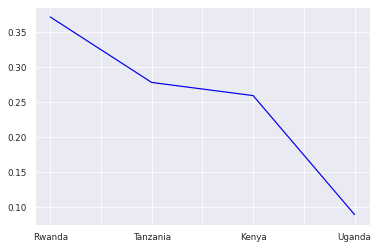

In [83]:
(core_df['country'].value_counts().head(10)/len(core_df)).plot.line()

There were more respondents from Rwanda, followed by Tanzania,kenya and Uganda

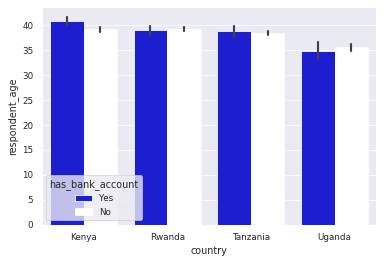

In [87]:
# Plotting staked plots
sns.barplot(x= 'country', y = 'respondent_age', data = core_df, hue='has_bank_account')

There is 50/50 distribution of repondents with or without bank accounts below age 40 in the 4 countries

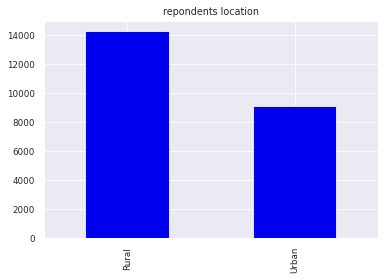

In [88]:
#location of respondents
core_df['location_type'].value_counts().plot.bar(title='repondents location')

Most respondents were from rural locations

In [79]:
#correlation between age and household size variables
corr = core_df["respondent_age"].corr(core_df["household_size"],method = "pearson")
corr



-0.11967115234154871

low degree of corelation

In [80]:
#correlation between year and household size variables
corr = core_df["year"].corr(core_df["household_size"],method = "pearson")
corr

-0.05248406515317324

weak correlation

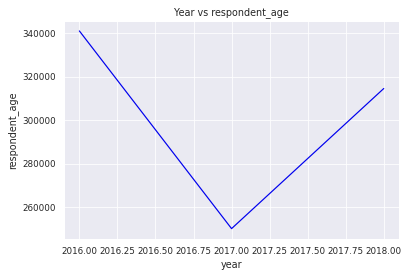

In [81]:
#line chart
#year vs respondent age
var = core_df.groupby('year').respondent_age.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Year')
ax1.set_ylabel('respondent_age')
ax1.set_title("Year vs respondent_age")
var.plot(kind='line')
#plt.xticks(np.arange(min(year), max(year)+1, 1.0))

# **`(iii) MULTIVARIATE ANALYSIS`**

# ***`(a) PRINCIPAL COMPONENT ANALYSIS (PCA)`***

In [89]:
#Creating Dummy Variables-numerical variable for pca analysis
dummy = pd.get_dummies(core_df)
dummy.head()

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,has_bank_account_No,has_bank_account_Yes,location_type_Rural,location_type_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,3.0,24.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,5.0,34.0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,8.0,26.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [90]:
pd.get_dummies(core_df)

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,has_bank_account_No,has_bank_account_Yes,location_type_Rural,location_type_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,3.0,24.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,5.0,34.0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,8.0,26.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,4.0,48.0,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23520,2018,2.0,27.0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
23521,2018,5.0,27.0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
23522,2018,7.0,30.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [91]:
dummy.shape

(23340, 37)

In [92]:
#Preprocessing
#Dividing my features into the feature set and corresponding labels: X and Y respectively.
x = core_df.drop("has_bank_account",1)
y = core_df["has_bank_account"]
x.head()

,country,year,location_type,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,education_level,job_type
0,Kenya,2018,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


In [93]:
x.shape

(23340, 10)

In [94]:
y.shape

(23340,)

In [95]:
#creating dummy for the categorical data
x = pd.get_dummies(x)
x.head(2)

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_type_Rural,location_type_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,3.0,24.0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [96]:
#splitting the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)
x_train, x_test, y_train, y_test

(       year  ...  job_type_Self employed
 4366   2018  ...                       0
 41     2018  ...                       0
 21475  2018  ...                       0
 11916  2016  ...                       0
 3910   2018  ...                       0
 ...     ...  ...                     ...
 1884   2018  ...                       0
 8872   2016  ...                       0
 17273  2017  ...                       0
 14965  2017  ...                       0
 19303  2017  ...                       1
 
 [17505 rows x 35 columns],        year  ...  job_type_Self employed
 4126   2018  ...                       0
 3093   2018  ...                       0
 7954   2016  ...                       0
 22116  2018  ...                       1
 22828  2018  ...                       0
 ...     ...  ...                     ...
 17664  2017  ...                       1
 16136  2017  ...                       0
 16056  2017  ...                       1
 4297   2018  ...                       1
 1048

In [97]:
#Perform Feature Scaling#standardisation
#As you can see in the dataset, all values are not in the same range. And that requires a lot of time for calculation. So to overcome this problem, we perform feature scaling.

#Feature scaling help us to normalize the data within a particular range.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_test
x_train

array([[ 1.20063189,  0.13183068, -1.25548293, ..., -0.22112097,
         2.86079627, -0.61183533],
       [ 1.20063189,  0.13183068, -1.19473846, ..., -0.22112097,
         2.86079627, -0.61183533],
       [ 1.20063189,  0.56889431, -1.25548293, ...,  4.52241151,
        -0.34955303, -0.61183533],
       ...,
       [ 0.02340334, -0.74229659, -0.52654926, ..., -0.22112097,
         2.86079627, -0.61183533],
       [ 0.02340334, -1.17936022,  2.20695201, ..., -0.22112097,
         2.86079627, -0.61183533],
       [ 0.02340334, -0.74229659, -0.64803821, ..., -0.22112097,
        -0.34955303,  1.63442671]])

In [98]:
#Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_train
x_test

array([[ 1.09401725e+00, -7.14948882e-01,  5.09438997e-01, ...,
         4.27806275e-16,  3.57222077e-16, -5.54564825e-17],
       [ 2.12875192e-01, -2.02412198e+00,  2.01982417e+00, ...,
         1.78006095e-16, -5.03200767e-16,  1.45771441e-16],
       [-2.21884601e+00, -3.73153199e-01, -6.60389810e-01, ...,
         1.17720682e-15, -5.86467494e-16,  4.23327197e-16],
       ...,
       [ 1.45910358e+00,  4.49541293e-01, -1.26009663e+00, ...,
         9.80393909e-17,  4.70978876e-16,  8.36826828e-16],
       [ 3.04750145e-01,  8.96961883e-01,  2.01342463e+00, ...,
         6.53150903e-16,  3.59956574e-16,  6.28660011e-16],
       [-2.48969621e+00,  3.96047029e-01, -1.11634246e+00, ...,
         1.50250519e-16, -3.64422889e-16,  5.69043969e-16]])

In [99]:
#Explained Variance Ratio
#returns the variance caused by each of the principal components.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.17422845e-01, 8.09632302e-02, 7.22605480e-02, 5.50782548e-02,
       5.37374024e-02, 4.81508611e-02, 4.39179772e-02, 3.96085301e-02,
       3.79277202e-02, 3.42718919e-02, 3.29731793e-02, 3.07207269e-02,
       3.02425069e-02, 2.91789097e-02, 2.89378065e-02, 2.85377186e-02,
       2.85212743e-02, 2.79144381e-02, 2.74278859e-02, 2.67974329e-02,
       2.53121789e-02, 2.32880994e-02, 2.05650635e-02, 1.80912665e-02,
       1.39770573e-02, 1.26955094e-02, 1.14796851e-02, 3.77930261e-31,
       1.91644773e-32, 4.80916068e-33, 3.50732201e-33, 2.41803808e-33,
       1.99796727e-33, 1.08298963e-33, 1.28293484e-34])

In [100]:
#Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [101]:
#training and making prediction
#we use random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [102]:
 #Predict the Test Set Results
y_pred = rfc.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [104]:
#Make the Confusion Matrix
#to explain predicted values
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)*100

[[4820  238]
 [ 578  199]]


86.01542416452442

It has an accuracy of 86.02%

# ***`(b) FACTOR ANALYSIS`***

In [112]:
core_df.head()

,country,year,has_bank_account,location_type,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


In [113]:
#get dummy data
dummy = pd.get_dummies(core_df)

In [114]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23523
Data columns (total 37 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   year                                             23340 non-null  int64  
 1   household_size                                   23340 non-null  float64
 2   respondent_age                                   23340 non-null  float64
 3   country_Kenya                                    23340 non-null  uint8  
 4   country_Rwanda                                   23340 non-null  uint8  
 5   country_Tanzania                                 23340 non-null  uint8  
 6   country_Uganda                                   23340 non-null  uint8  
 7   has_bank_account_No                              23340 non-null  uint8  
 8   has_bank_account_Yes                             23340 non-null  uint8  
 9   location_type_Rural         

In [115]:
#perform adequacy test
#Use Bartlett’s test
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all 
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(dummy)
chi_square_value, p_value


/usr/local/lib/python3.7/dist-packages/factor_analyzer/factor_analyzer.py:188: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(nan, nan)

In [116]:
# 
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(dummy)

/usr/local/lib/python3.7/dist-packages/factor_analyzer/factor_analyzer.py:50: RuntimeWarning: invalid value encountered in sqrt
  Is = np.sqrt(1 / np.diag(m))


In [117]:
#choose numbe of factors
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(dummy, 36, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,4.123830e+00
1,3.364115e+00
2,2.529230e+00
3,2.163878e+00
4,1.881439e+00
5,1.721628e+00
6,1.564861e+00
7,1.446797e+00
8,1.362723e+00
9,1.298371e+00


31-factors eigenvalues are greater than one. 
So we are choosing 31 factors (or unobserved variables).

In [119]:
#Performing Factor Analysis
# Creating factor analysis object and perform factor analysis
#
fa = FactorAnalyzer()
fa.analyze(dummy, 31, rotation="varimax")
fa.loadings


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,Factor21,Factor22,Factor23,Factor24,Factor25,Factor26,Factor27,Factor28,Factor29,Factor30,Factor31
year,-0.102428,0.050082,0.952480,-0.013494,0.001798,0.044139,0.239732,0.038055,0.005359,0.051027,0.006302,0.043751,0.014452,0.008415,0.034579,0.008056,0.045413,-0.005931,0.007431,-0.020311,-0.002410,0.028899,0.029705,0.010224,-0.019300,-0.076001,0.000932,0.0,0.0,0.0,0.0
household_size,0.178516,-0.022819,-0.051472,-0.169958,-0.006158,0.047636,0.115607,-0.046989,-0.090982,0.013189,0.171417,-0.015772,-0.006508,0.005000,-0.037730,-0.007536,0.019291,0.000340,0.004149,0.006882,-0.020431,0.019180,-0.048232,-0.042817,0.442094,0.060953,0.178979,0.0,0.0,0.0,0.0
respondent_age,0.025050,0.037344,0.012749,0.489121,-0.052654,-0.134394,-0.043982,0.068126,-0.080085,0.085408,0.187762,-0.031518,-0.001861,-0.002851,-0.047985,0.004834,-0.010295,0.019073,0.008038,0.239462,0.110247,-0.045465,-0.042208,-0.068955,-0.093153,0.055078,-0.187372,0.0,0.0,0.0,0.0
country_Kenya,-0.000534,0.107324,0.838976,0.032809,-0.007752,0.082638,-0.339628,-0.041679,-0.024629,-0.030253,0.074809,0.044350,0.052520,-0.021906,-0.057238,0.015500,-0.041887,-0.008230,0.013119,0.001158,0.003142,0.079717,0.020903,-0.011600,0.346215,0.086645,-0.066787,0.0,0.0,0.0,0.0
country_Rwanda,0.209883,-0.014841,-0.827509,0.039192,0.007091,0.008610,-0.176917,-0.090366,-0.032528,-0.065636,0.093488,-0.029989,0.008694,0.003102,-0.052716,-0.002222,-0.010602,0.008608,-0.004198,0.027277,0.001387,-0.016981,-0.026621,-0.038094,0.427252,0.142258,-0.059069,0.0,0.0,0.0,0.0
country_Tanzania,-0.258598,-0.062863,-0.019684,-0.058958,-0.018696,-0.102180,-0.072585,0.122793,0.059997,0.044888,-0.213549,-0.018203,-0.046125,-0.022631,0.048182,-0.010469,-0.063160,-0.007330,-0.005022,-0.020349,0.001574,-0.018123,0.001139,0.062785,-0.884832,-0.162822,0.125620,0.0,0.0,0.0,0.0
country_Uganda,0.051452,-0.040959,0.143149,-0.024143,0.029223,0.018911,0.933992,0.024177,-0.001302,0.087003,0.062046,0.011223,-0.022935,0.063848,0.101386,-0.003604,0.181232,0.009563,-0.005150,-0.015991,-0.009634,-0.065154,0.011164,-0.016250,0.134034,-0.118131,0.005338,0.0,0.0,0.0,0.0
has_bank_account_No,0.042405,-0.973479,-0.060098,0.001404,0.055780,-0.050988,0.021122,0.100984,0.009576,-0.029160,-0.029671,-0.076357,-0.077291,0.001454,0.017072,-0.001567,-0.009741,-0.002569,-0.011204,0.018758,-0.009192,0.015310,-0.079372,-0.081484,-0.017175,0.003231,0.002552,0.0,0.0,0.0,0.0
has_bank_account_Yes,-0.042405,0.973479,0.060098,-0.001404,-0.055780,0.050988,-0.021122,-0.100984,-0.009576,0.029160,0.029671,0.076357,0.077291,-0.001454,-0.017072,0.001567,0.009741,0.002569,0.011204,-0.018758,0.009192,-0.015310,0.079372,0.081484,0.017175,-0.003231,-0.002552,0.0,0.0,0.0,0.0
location_type_Rural,0.967076,-0.043765,-0.107892,0.025172,0.004335,-0.018741,0.022028,-0.037029,0.000072,-0.016688,0.095862,-0.013241,-0.016064,0.006192,-0.011136,-0.002837,-0.008306,-0.001619,-0.002803,0.022191,0.001584,-0.015093,-0.017492,-0.020481,0.162196,0.089088,0.002056,0.0,0.0,0.0,0.0


In [120]:
#Performing factor analysis for 31 factors
# 
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer()
fa.analyze(dummy, 31, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,Factor21,Factor22,Factor23,Factor24,Factor25,Factor26,Factor27,Factor28,Factor29,Factor30,Factor31
year,-0.102428,0.050082,0.952480,-0.013494,0.001798,0.044139,0.239732,0.038055,0.005359,0.051027,0.006302,0.043751,0.014452,0.008415,0.034579,0.008056,0.045413,-0.005931,0.007431,-0.020311,-0.002410,0.028899,0.029705,0.010224,-0.019300,-0.076001,0.000932,0.0,0.0,0.0,0.0
household_size,0.178516,-0.022819,-0.051472,-0.169958,-0.006158,0.047636,0.115607,-0.046989,-0.090982,0.013189,0.171417,-0.015772,-0.006508,0.005000,-0.037730,-0.007536,0.019291,0.000340,0.004149,0.006882,-0.020431,0.019180,-0.048232,-0.042817,0.442094,0.060953,0.178979,0.0,0.0,0.0,0.0
respondent_age,0.025050,0.037344,0.012749,0.489121,-0.052654,-0.134394,-0.043982,0.068126,-0.080085,0.085408,0.187762,-0.031518,-0.001861,-0.002851,-0.047985,0.004834,-0.010295,0.019073,0.008038,0.239462,0.110247,-0.045465,-0.042208,-0.068955,-0.093153,0.055078,-0.187372,0.0,0.0,0.0,0.0
country_Kenya,-0.000534,0.107324,0.838976,0.032809,-0.007752,0.082638,-0.339628,-0.041679,-0.024629,-0.030253,0.074809,0.044350,0.052520,-0.021906,-0.057238,0.015500,-0.041887,-0.008230,0.013119,0.001158,0.003142,0.079717,0.020903,-0.011600,0.346215,0.086645,-0.066787,0.0,0.0,0.0,0.0
country_Rwanda,0.209883,-0.014841,-0.827509,0.039192,0.007091,0.008610,-0.176917,-0.090366,-0.032528,-0.065636,0.093488,-0.029989,0.008694,0.003102,-0.052716,-0.002222,-0.010602,0.008608,-0.004198,0.027277,0.001387,-0.016981,-0.026621,-0.038094,0.427252,0.142258,-0.059069,0.0,0.0,0.0,0.0
country_Tanzania,-0.258598,-0.062863,-0.019684,-0.058958,-0.018696,-0.102180,-0.072585,0.122793,0.059997,0.044888,-0.213549,-0.018203,-0.046125,-0.022631,0.048182,-0.010469,-0.063160,-0.007330,-0.005022,-0.020349,0.001574,-0.018123,0.001139,0.062785,-0.884832,-0.162822,0.125620,0.0,0.0,0.0,0.0
country_Uganda,0.051452,-0.040959,0.143149,-0.024143,0.029223,0.018911,0.933992,0.024177,-0.001302,0.087003,0.062046,0.011223,-0.022935,0.063848,0.101386,-0.003604,0.181232,0.009563,-0.005150,-0.015991,-0.009634,-0.065154,0.011164,-0.016250,0.134034,-0.118131,0.005338,0.0,0.0,0.0,0.0
has_bank_account_No,0.042405,-0.973479,-0.060098,0.001404,0.055780,-0.050988,0.021122,0.100984,0.009576,-0.029160,-0.029671,-0.076357,-0.077291,0.001454,0.017072,-0.001567,-0.009741,-0.002569,-0.011204,0.018758,-0.009192,0.015310,-0.079372,-0.081484,-0.017175,0.003231,0.002552,0.0,0.0,0.0,0.0
has_bank_account_Yes,-0.042405,0.973479,0.060098,-0.001404,-0.055780,0.050988,-0.021122,-0.100984,-0.009576,0.029160,0.029671,0.076357,0.077291,-0.001454,-0.017072,0.001567,0.009741,0.002569,0.011204,-0.018758,0.009192,-0.015310,0.079372,0.081484,0.017175,-0.003231,-0.002552,0.0,0.0,0.0,0.0
location_type_Rural,0.967076,-0.043765,-0.107892,0.025172,0.004335,-0.018741,0.022028,-0.037029,0.000072,-0.016688,0.095862,-0.013241,-0.016064,0.006192,-0.011136,-0.002837,-0.008306,-0.001619,-0.002803,0.022191,0.001584,-0.015093,-0.017492,-0.020481,0.162196,0.089088,0.002056,0.0,0.0,0.0,0.0


In [121]:
#  Getting variance of each factors
# 
fa.get_factor_variance()

# 96% cumulative Variance explained by the 31factors.

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,Factor21,Factor22,Factor23,Factor24,Factor25,Factor26,Factor27,Factor28,Factor29,Factor30,Factor31
SS Loadings,2.166546,2.070901,2.412079,1.484674,2.032451,1.384509,1.183485,2.044761,1.153097,1.321009,1.695150,1.043036,1.011872,1.004302,1.038538,0.995780,1.069562,0.997619,0.995613,1.453816,1.014194,1.135699,1.042814,1.071241,1.581401,1.169427,0.101018,0.000000,0.000000,0.000000,0.000000
Proportion Var,0.058555,0.055970,0.065191,0.040126,0.054931,0.037419,0.031986,0.055264,0.031165,0.035703,0.045815,0.028190,0.027348,0.027143,0.028069,0.026913,0.028907,0.026963,0.026908,0.039292,0.027411,0.030695,0.028184,0.028952,0.042741,0.031606,0.002730,0.000000,0.000000,0.000000,0.000000
Cumulative Var,0.058555,0.114526,0.179717,0.219843,0.274774,0.312193,0.344180,0.399443,0.430608,0.466311,0.512126,0.540316,0.567664,0.594807,0.622876,0.649789,0.678696,0.705659,0.732567,0.771859,0.799270,0.829965,0.858149,0.887101,0.929842,0.961448,0.964178,0.964178,0.964178,0.964178,0.964178


## Implementing the Solution

1. A big percentage of households had different job occupations other than government dependent and government formal employments

2. A big percentage of the surveyed households have acquired education less than tertiary education level

 These accounts for high number of households without bank accounts.
 Maybe big percentage of the informally employed households have not opened bank accoun

##  Challenging the solution

Knowing exactly occupation and education level of housseholds with bank accounts will be more insightful.

Other factors such as households' income are important






## Follow up questions

The research question was right. The data for this research had insufficient information. More information is required to trickle down the research question
1. Did we have the right questions? Yes we did
